# Т-Банк: использование инструментов инвестирования

Презентация на основании проделанной работы: https://disk.yandex.ru/i/cf-8qf8YdvXroQ

## Цели исследования

- Провести разведочный анализ даных.
- Сформулировать 2-3 продуктовые гипотезы, которые можно было бы проверить на данных из датасета.

### Изучение данных

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [275]:
df = pd.read_csv('invest_db.csv', sep=';', decimal=',')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458370 entries, 0 to 458369
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        458370 non-null  int64  
 1   date                      458370 non-null  object 
 2   age                       458370 non-null  int64  
 3   education_level_cd        233460 non-null  object 
 4   marital_status_cd         267030 non-null  object 
 5   children_cnt              410310 non-null  float64
 6   monthly_income_amt        355140 non-null  float64
 7   invest_utilization_dt     458370 non-null  object 
 8   forts_flg                 458370 non-null  int64  
 9   margin_status_flg         458370 non-null  int64  
 10  qualified_investor_flg    458370 non-null  int64  
 11  in_payment_rub_amt        458370 non-null  float64
 12  out_payment_rub_amt       458370 non-null  float64
 13  uncovered_position_amt    458370 non-null  f

In [277]:
df.head()

,id,date,age,education_level_cd,marital_status_cd,children_cnt,monthly_income_amt,invest_utilization_dt,forts_flg,margin_status_flg,...,portf_fnd_amt,portf_opt_amt,portf_ore_amt,ccr_balance_amt,cor_balance_amt,lon_balance_amt,posts,comments,reacts,reads
0,1479787897,2024-04-20,33,NaN,UNM,0.0,31272.0,2023-09-13,1,0,...,428.0,0.0,0.0,-11298.0,541.0,0.0,0.0,0.0,0.0,0.0
1,601760063,2024-02-01,29,GRD,UNM,0.0,6284.0,2021-03-29,0,0,...,23.0,0.0,0.0,NaN,8115.0,0.0,0.0,0.0,0.0,0.0
2,61175329,2024-02-10,38,SCH,MAR,0.0,1904.0,2023-12-05,1,0,...,193.0,0.0,0.0,0.0,25.0,NaN,0.0,0.0,0.0,2.0
3,1411700618,2024-03-05,64,NaN,NaN,0.0,NaN,2021-09-16,0,0,...,0.0,0.0,0.0,NaN,65.0,NaN,0.0,0.0,0.0,0.0
4,2096755145,2024-02-10,31,NaN,UNM,0.0,NaN,2022-03-01,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


### Поиск пропущенных значений

Пропущенные значения имеются в 11 столбцах:
- education_level_cd;
- marital_status_cd;
- children_cnt;
- monthly_income_amt;
- ccr_balance_amt;
- cor_balance_amt;
- lon_balance_amt;
- posts;
- comments;
- reacts;
- reads;

Пропущенные значения объясняются отсутствием каких-либо данных о клиенте, например, отсустствие данных о количестве детей либо семейном статусе. Часть пропусков объясняется тем, что клиент не пользуется определенными продуктами или функциями банка, например, не имеет дебетового или сберегательного счета, а также не ставит лайки и не пишет посты. Следовательно, все пропуски находятся в рамках нормы.

### Проверка наличия дубликатов

In [278]:
df.duplicated().sum()

0

### Приведение типов для удобства анализа

Приведу date к типу даты.

In [279]:
df['date'] = pd.to_datetime(df['date'])

### Исследовательский анализ данных

Параметров слишком много, так что сосредоточусь на нескольких, которые, как мне кажется, наиболее полно описывают портрет идеального клиента. Т-Инвестиции в первую очередь зарабатывает на комиссии со сделок клиентов, следовательно, самыми важными параметрами я выделю:
- monthly_income_amt, так как от месячного дохода клиента зависит и сумма, которую он инвестирует.
- in_payment_rub_amt, чем больше средств ввел клиент, тем потенциально больше мы получим в виде комиссии.
- total_trade_orders, в данном случае объединю 10 параметров, которые описывают количество сделок клиента. Чем больше сделок, тем больше раз будте взиматься комиссия.
- portf_total_amt, суть такая же как с monthly_income_amt и in_payment_rub_amt.
- cor_balance_amt, средства, которые клиент имеет на сберегательном счете или дивидендном счете - это потенциальные средства, которые он может перевести в инвестции, если мы сможем его к этому замотивировать

In [317]:
df['id'].nunique()

5093

Всего в датасете 5093 уникальных клиентов.

In [280]:
df['month'] = df['date'].dt.to_period('M')

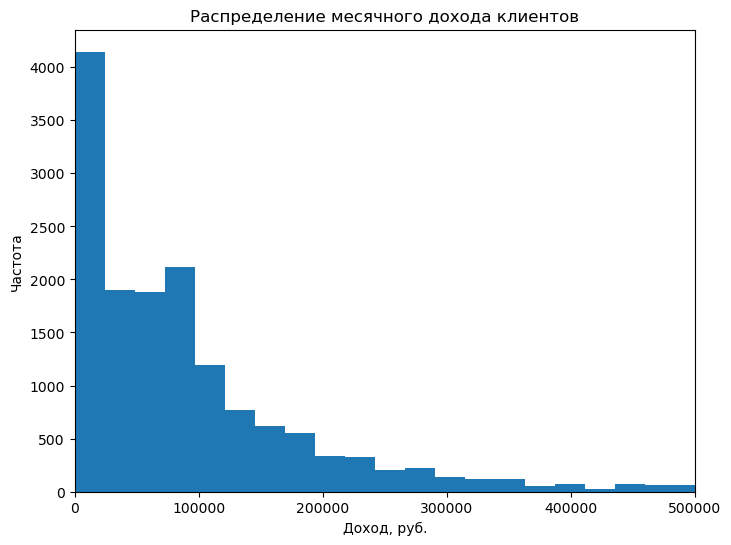

In [281]:
plt.figure(figsize=(8, 6))

df.groupby(['id', 'month'])['monthly_income_amt'].sum().plot(kind='hist', bins=200, xlim=(0, 500000))

plt.title('Распределение месячного дохода клиентов')
plt.xlabel('Доход, руб.')
plt.ylabel('Частота')
plt.show()

In [282]:
(df.groupby(['id', 'month'])['monthly_income_amt'].sum()/1000).describe()

count    15279.000000
mean       104.852865
std        172.241274
min          0.000000
25%         18.247500
50%         68.571000
75%        132.098500
max       4844.591000
Name: monthly_income_amt, dtype: float64

Медаинный месячный доход клиентов равен 68 тыс. руб., а средний - 108 тыс. руб. Минимальный месячный доход равен 0, то есть отсутствие дохода, а максимальный - 4844 тыс. руб. Числа выглядят ожидаемо, не выбиваются за рамки нормы.

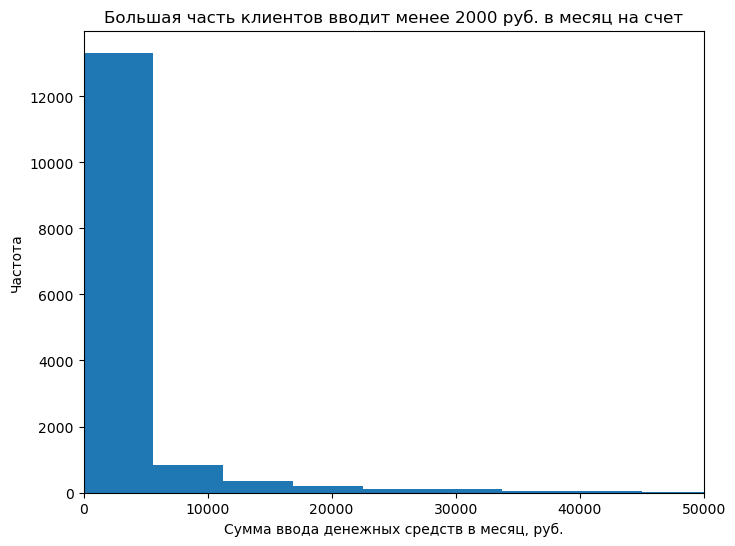

In [283]:
plt.figure(figsize=(8, 6))

df.groupby(['id', 'month'])['in_payment_rub_amt'].sum().plot(kind='hist', bins=1000, xlim=(0, 50000))

plt.title('Большая часть клиентов вводит менее 2000 руб. в месяц на счет')
plt.xlabel('Сумма ввода денежных средств в месяц, руб.')
plt.ylabel('Частота')
plt.show()

In [284]:
(df.groupby(['id', 'month'])['in_payment_rub_amt'].sum()/1000).describe()

count    15279.000000
mean         7.043236
std         90.693245
min          0.000000
25%          0.000000
50%          0.378000
75%          2.031000
max       5627.352000
Name: in_payment_rub_amt, dtype: float64

В среднем в месяц клиенты переводят 7 тыс. руб, при этом медианное значение всего 378 руб., что значительно ниже медианного дохода. Следовательно, есть еще большой запас средств, которые клиенты могут потенциально переводить в инвестиции, если будут видеть в этом преимущество для себя.

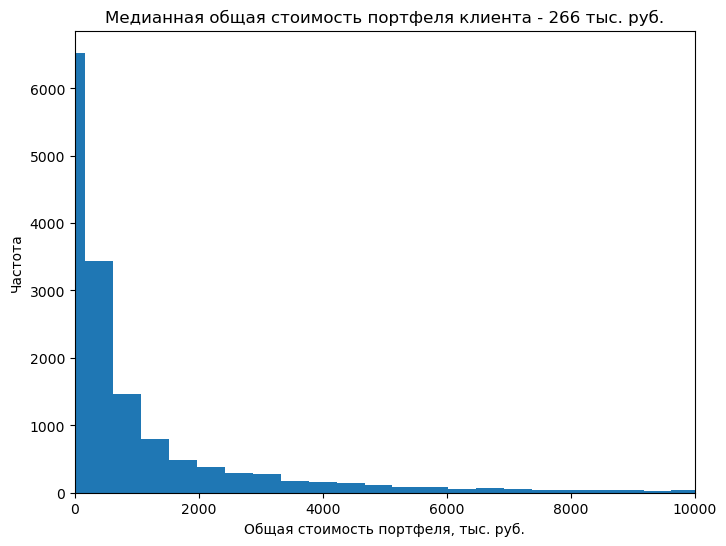

In [285]:
plt.figure(figsize=(8, 6))

(df.groupby(['id', 'month'])['portf_total_amt'].sum()/1000).plot(kind='hist', bins=1000, xlim=(0,10000))

plt.title('Медианная общая стоимость портфеля клиента - 266 тыс. руб.')
plt.xlabel('Общая стоимость портфеля, тыс. руб.')
plt.ylabel('Частота')
plt.show()

In [286]:
(df.groupby(['id', 'month'])['portf_total_amt'].sum()/1000).describe()

count     15279.000000
mean       1817.103206
std        9605.200212
min        -277.778000
25%          55.840000
50%         265.742000
75%        1089.976000
max      449822.348000
Name: portf_total_amt, dtype: float64

В среднем общий портфель клиента стоит 1817 тыс. руб., медианное значение - 266 тыс. руб. При этом имеются отрицательные значения, которые говорят о наличии задолженности у клиента, например, непокрытой позиции.

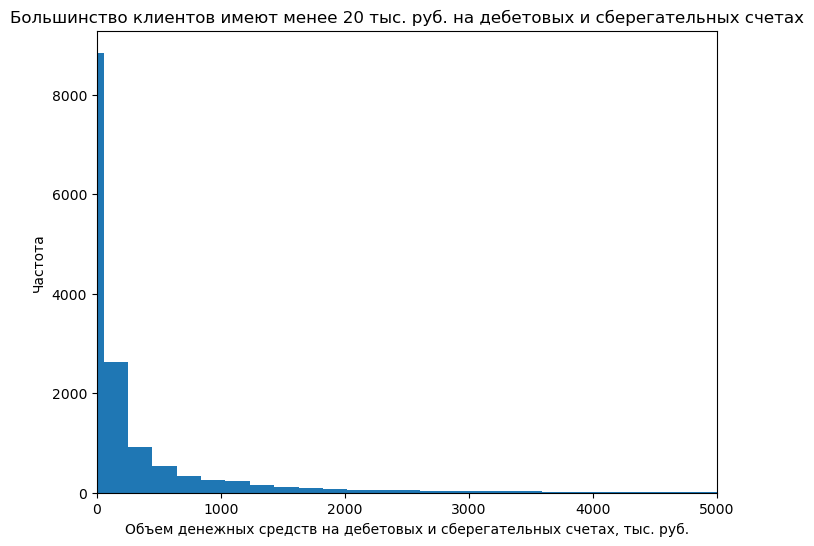

In [287]:
plt.figure(figsize=(8, 6))

(df.groupby(['id', 'month'])['cor_balance_amt'].sum()/1000).plot(kind='hist', bins=500, xlim=(0,5000))

plt.title('Большинство клиентов имеют менее 20 тыс. руб. на дебетовых и сберегательных счетах')
plt.xlabel('Объем денежных средств на дебетовых и сберегательных счетах, тыс. руб.')
plt.ylabel('Частота')
plt.show()

In [288]:
(df.groupby(['id', 'month'])['cor_balance_amt'].sum()/1000).describe()

count    15279.000000
mean       341.402544
std       1967.810898
min      -9775.926000
25%          1.550500
50%         17.080000
75%        181.455500
max      88508.520000
Name: cor_balance_amt, dtype: float64

В среднем клиенты имеют 341 тыс. руб. на дебетовых и сберегательных счетах, однако медиана равна всего 17 тыс. руб., что говорит о том, что большинство клиентов не имеет большого количества свободных средств, которые мы могли бы попробовать привлечь в инвестиции.

In [289]:
df['total_trade_orders'] = df.filter(like='trade_order_').sum(axis=1)

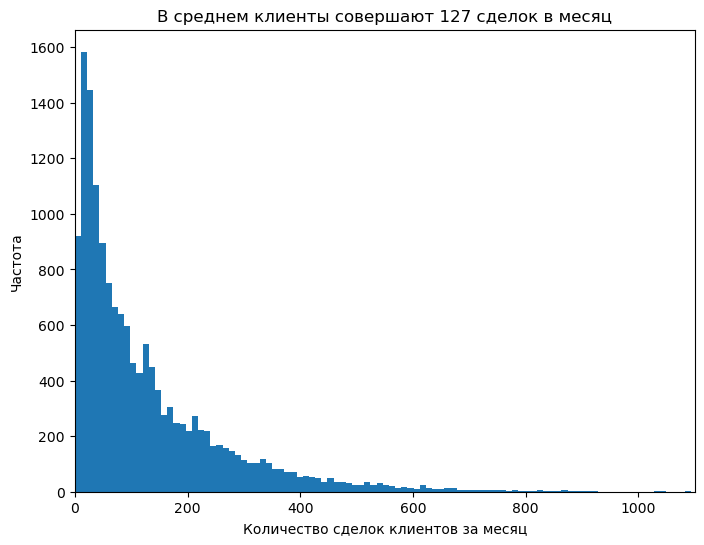

In [290]:
plt.figure(figsize=(8, 6))

df.groupby(['id', 'month'])['total_trade_orders'].sum().plot(kind='hist', bins=100, xlim=(0,1100))

plt.title('В среднем клиенты совершают 127 сделок в месяц')
plt.xlabel('Количество сделок клиентов за месяц')
plt.ylabel('Частота')
plt.show()

In [291]:
df.groupby(['id', 'month'])['total_trade_orders'].sum().describe()

count    15279.000000
mean       127.506709
std        134.950618
min          0.000000
25%         31.000000
50%         81.000000
75%        176.000000
max       1093.000000
Name: total_trade_orders, dtype: float64

В среднем клиенты совершают 127 сделок в месяц, медианное значение равно 81. Мне кажется, это довольно крупный показатель по количеству сделок.

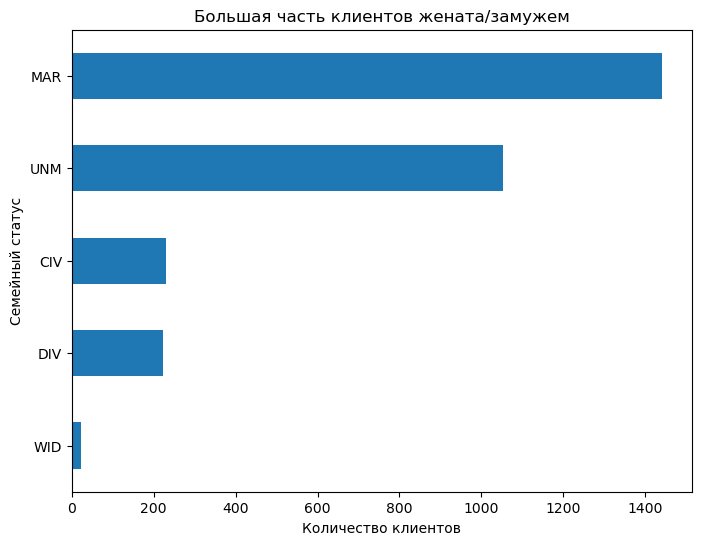

In [292]:
plt.figure(figsize=(8, 6))

df.groupby('marital_status_cd')['id'].nunique().sort_values().plot(kind='barh')

plt.title('Большая часть клиентов жената/замужем')
plt.xlabel('Количество клиентов')
plt.ylabel('Семейный статус')
plt.show()

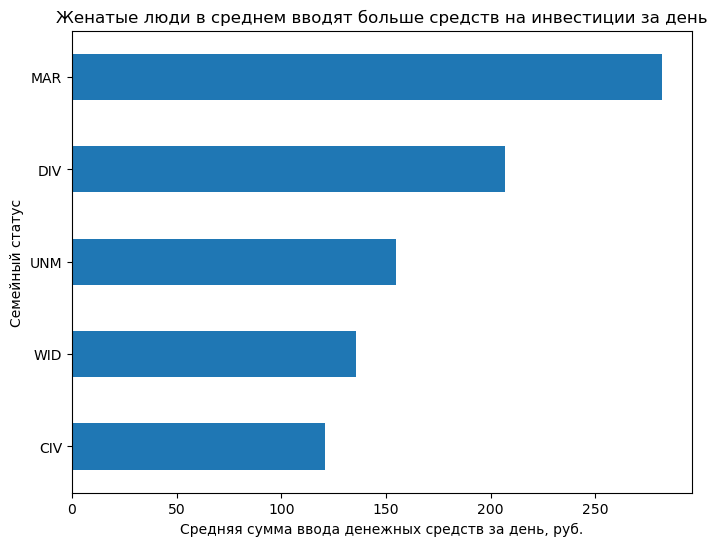

In [293]:
plt.figure(figsize=(8, 6))

df.groupby('marital_status_cd')['in_payment_rub_amt'].mean().sort_values().plot(kind='barh')

plt.title('Женатые люди в среднем вводят больше средств на инвестиции за день')
plt.xlabel('Средняя сумма ввода денежных средств за день, руб.')
plt.ylabel('Семейный статус')
plt.show()

Предополагаю, что это связано с личностными качествами людей, которые женятся/выходят замуж, а также с ответственностью и общими финансовыми целями, которые появляются вместе с женой/мужем.

### Анализ для продуктовых гипотез

In [315]:
total_trade_percentile = np.percentile(df.groupby('id')['total_trade_orders'].sum(), 25)
reads_percentile = np.percentile(df.groupby('id')['reads'].sum(), 75)

df.groupby('id',as_index=False)[['total_trade_orders', 'reads']].sum().query('total_trade_orders < @total_trade_percentile and reads > @reads_percentile')

,id,total_trade_orders,reads
14,5621374,101.0,1240.0
20,7841749,99.0,865.0
35,12069814,92.0,306.0
39,13527878,41.0,412.0
46,16576650,69.0,461.0
...,...,...,...
4982,2098039931,100.0,804.0
4986,2098815293,110.0,497.0
5014,2110401404,101.0,1089.0
5025,2117025073,72.0,1114.0


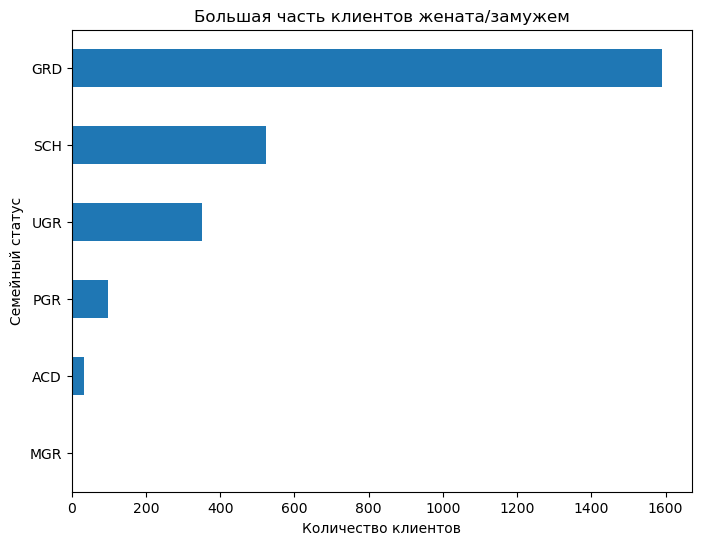

In [318]:
plt.figure(figsize=(8, 6))

df.groupby('education_level_cd')['id'].nunique().sort_values().plot(kind='barh')

plt.title('Большая часть клиентов жената/замужем')
plt.xlabel('Количество клиентов')
plt.ylabel('Семейный статус')
plt.show()

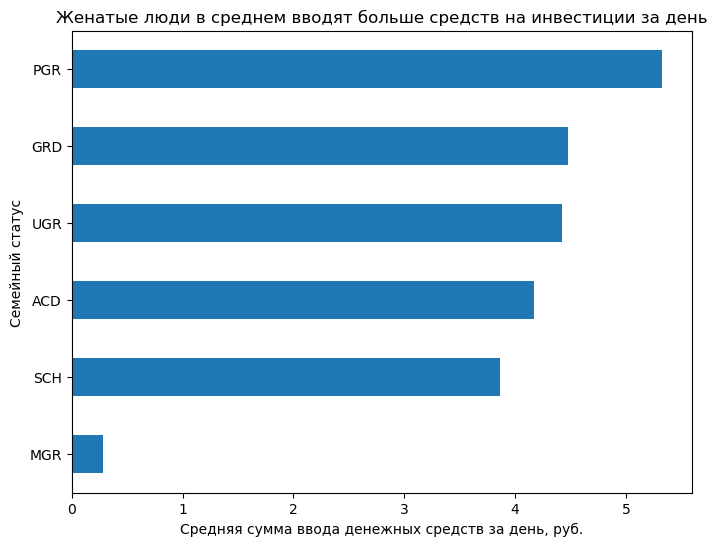

In [319]:
plt.figure(figsize=(8, 6))

df.groupby('education_level_cd')['total_trade_orders'].mean().sort_values().plot(kind='barh')

plt.title('Женатые люди в среднем вводят больше средств на инвестиции за день')
plt.xlabel('Средняя сумма ввода денежных средств за день, руб.')
plt.ylabel('Семейный статус')
plt.show()

In [324]:
def age_group(age):
    if age < 30:
        return '< 30'
    elif age <= 45:
        return '30–45'
    elif age <= 60:
        return '45–60'
    else:
        return '> 60'

df['age_group'] = df['age'].apply(age_group)

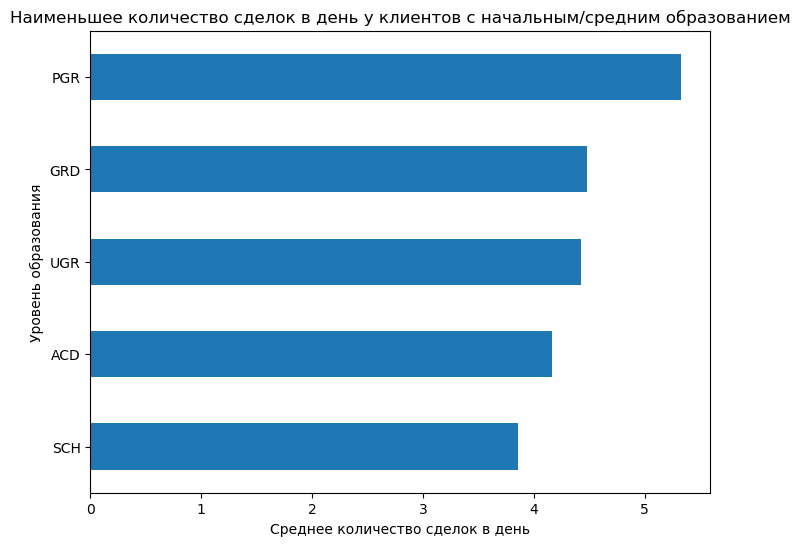

In [335]:
plt.figure(figsize=(8, 6))

df.query('education_level_cd != "MGR"').groupby('education_level_cd')['total_trade_orders'].mean().sort_values().plot(kind='barh')

plt.title('Наименьшее количество сделок в день у клиентов с начальным/средним образованием')
plt.xlabel('Среднее количество сделок в день')
plt.ylabel('Уровень образования')
plt.show()

In [336]:
df.query('education_level_cd != "MGR"').groupby('education_level_cd')['total_trade_orders'].mean().sort_values()

education_level_cd
SCH    3.860166
ACD    4.165972
UGR    4.424762
GRD    4.477352
PGR    5.326804
Name: total_trade_orders, dtype: float64